# 데이터 전처리와 스케일 조정

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from IPython import display
import mglearn
from sklearn.model_selection import train_test_split

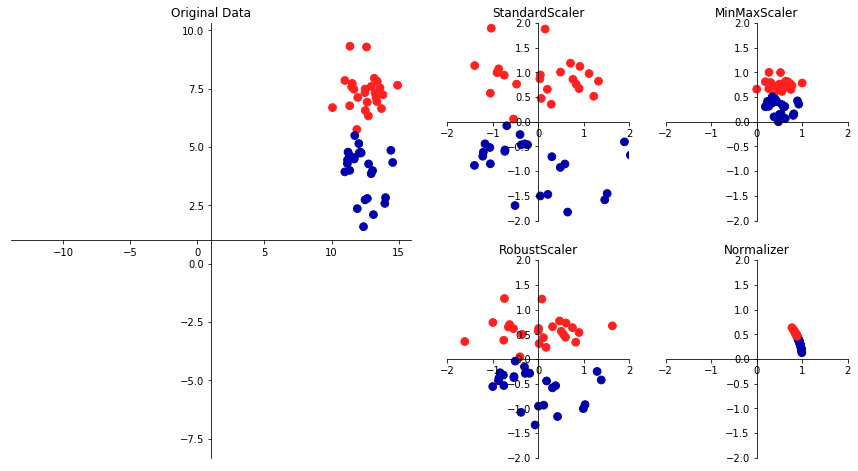

In [2]:
mglearn.plots.plot_scaling()

### 여러가지 전처리 방법
- StandardScaler : 각 특성의 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 가지게 함
    - 특성의 최소~최대값의 크기를 제한하지 X
- MinMaxScaler : 모든 특성이 0~1사이에 위치하도록 데이터 변경
- Normalizer : 특성 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트 조정

In [3]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

X_train.shape

(426, 30)

In [4]:
X_test.shape

(143, 30)

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [6]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

fit 메서드로 학습한 변환을 적용하려면, 즉 실제로 훈련데이터의 스케일을 조정하려면 스케일 객체의 transform메서드 사용

In [7]:
# 데이터 변환
X_train_scaled = scaler.transform(X_train)

In [8]:
# 변환된 후 크기
X_train_scaled.shape

(426, 30)

In [9]:
# 스케일 조정 전 특성별 최소값 
X_train.min(axis=0)

array([6.981e+00, 9.710e+00, 4.379e+01, 1.435e+02, 5.263e-02, 1.938e-02,
       0.000e+00, 0.000e+00, 1.060e-01, 5.024e-02, 1.153e-01, 3.602e-01,
       7.570e-01, 6.802e+00, 1.713e-03, 2.252e-03, 0.000e+00, 0.000e+00,
       9.539e-03, 8.948e-04, 7.930e+00, 1.202e+01, 5.041e+01, 1.852e+02,
       7.117e-02, 2.729e-02, 0.000e+00, 0.000e+00, 1.566e-01, 5.521e-02])

In [10]:
# 스케일 조정 전 특성별 최대값
X_train.max(axis=0)

array([2.811e+01, 3.928e+01, 1.885e+02, 2.501e+03, 1.634e-01, 2.867e-01,
       4.268e-01, 2.012e-01, 3.040e-01, 9.575e-02, 2.873e+00, 4.885e+00,
       2.198e+01, 5.422e+02, 3.113e-02, 1.354e-01, 3.960e-01, 5.279e-02,
       6.146e-02, 2.984e-02, 3.604e+01, 4.954e+01, 2.512e+02, 4.254e+03,
       2.226e-01, 9.379e-01, 1.170e+00, 2.910e-01, 5.774e-01, 1.486e-01])

In [11]:
# 스케일 조정 후 특성별 최소값
X_train_scaled.min(axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
# 스케일 조정 후 특성별 최대값
X_train_scaled.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [13]:
# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)

In [14]:
X_test_scaled.min(axis=0)

array([ 0.0336031 ,  0.0226581 ,  0.03144219,  0.01141039,  0.14128374,
        0.04406704,  0.        ,  0.        ,  0.1540404 , -0.00615249,
       -0.00137796,  0.00594501,  0.00430665,  0.00079567,  0.03919502,
        0.0112206 ,  0.        ,  0.        , -0.03191387,  0.00664013,
        0.02660975,  0.05810235,  0.02031974,  0.00943767,  0.1094235 ,
        0.02637792,  0.        ,  0.        , -0.00023764, -0.00182032])

In [15]:
X_test_scaled.max(axis=0)

array([0.9578778 , 0.81501522, 0.95577362, 0.89353128, 0.81132075,
       1.21958701, 0.87956888, 0.9333996 , 0.93232323, 1.0371347 ,
       0.42669616, 0.49765736, 0.44117231, 0.28371044, 0.48703131,
       0.73863671, 0.76717172, 0.62928585, 1.33685792, 0.39057253,
       0.89612238, 0.79317697, 0.84859804, 0.74488793, 0.9154725 ,
       1.13188961, 1.07008547, 0.92371134, 1.20532319, 1.63068851])

MinMaxSclaer(다른 스케일 모델도)는 항상 훈련세트와 테스트 세트에 같은 변환을 적용해야 함.

transform 메서드는 테스트 세트의 최솟값과 범위를 사용하지 않고, 항상 훈련 세트의 최솟값을 빼고 훈련 세트의 범위로 나눔.

## 지도 학습에서 데이터 전처리 효과
SVC에 MinMaxScaler 적용

In [16]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도: 0.63


C:\Users\82106\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [17]:
# 0~1 사이로 스케일 조정
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도: 0.97


C:\Users\82106\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [18]:
# 평균 0, 분산 1을 갖도록 스케일 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


### 3.4 차원 축소, 특성 추출, 매니폴드 학습

3.4.1 주성분 분석(PCA)

주성분 분석은 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술

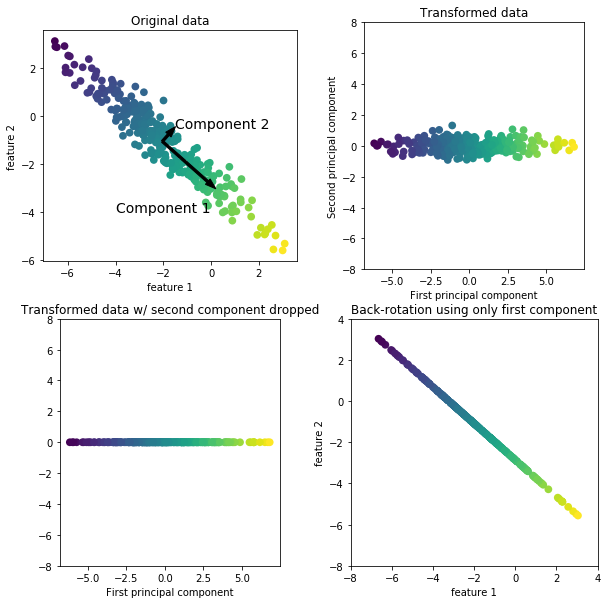

In [19]:
mglearn.plots.plot_pca_illustration()

위의 주된 분산의 방향(1, 2)를 `주성분`이라고 함

일반적으로 원본 특성 개수만큼의 주성분이 있음

#### PCA를 적용해 유방암 데이터셋 시각화하기

PCA가 가장 널리 사용되는 분야는 `고차원 데이터셋`의 시각화

3개 이상, 여러 특성에 대한 데이터를 산점도로 표기하기 쉽지 않으니

가장 쉬운 방법으로 악성, 양성으로 나눈다!

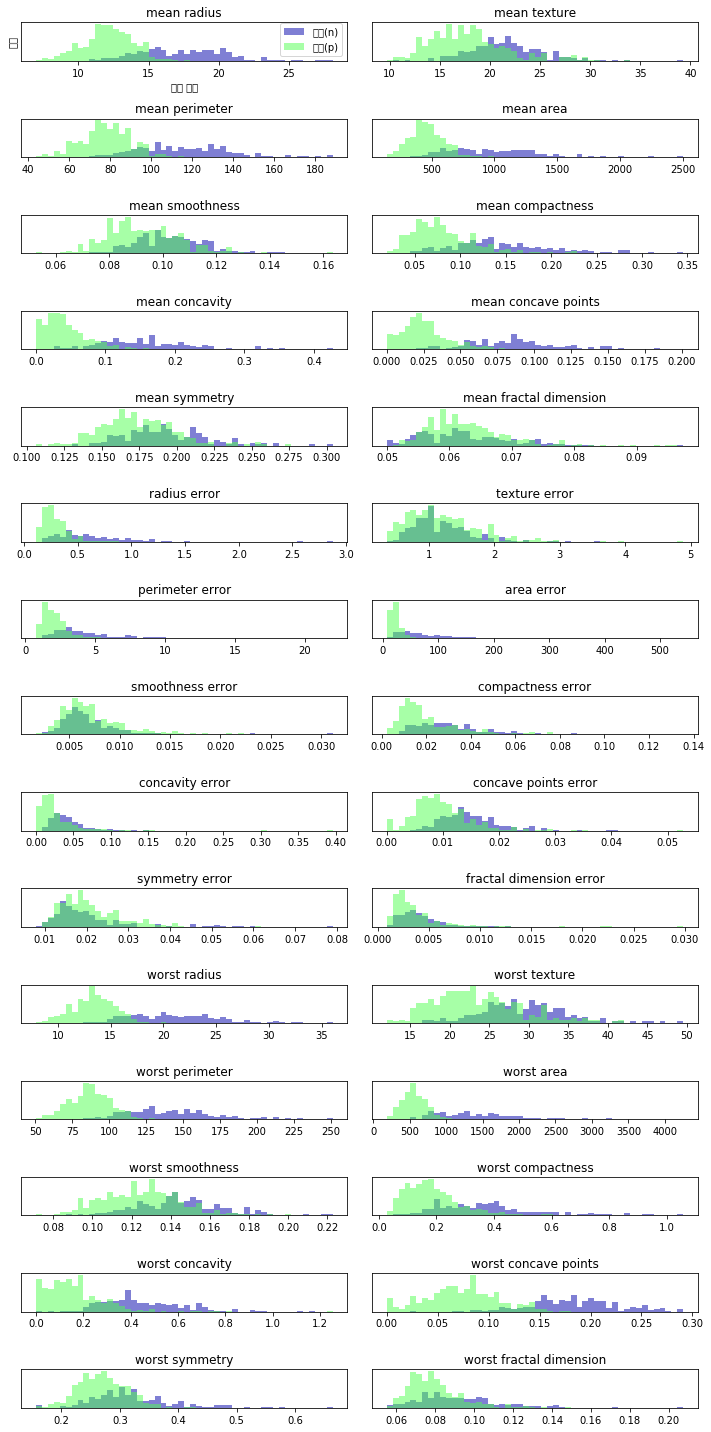

In [20]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성(n)", "양성(p)"], loc="best")
fig.tight_layout()

이 그림은 각 특성에 대한 히스토그램으로 특정 간격(bin)에 얼마나 많은 데이터 포인트가 나타나는지 횟수를 센 것

In [21]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

# PCA 변환을 학습하고 적용
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

transform 메서드를 호출해 데이터를 회전만 시키고 모든 주성분을 유지(기본값일 때)

데이터의 차원을 줄이려면 PCA 객체를 만들 때 얼마나 많은 성분을 유지할지 알려주어야 함.

In [22]:
from sklearn.decomposition import PCA
# 데이터의 처음 두 개 주성분만 유지

pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델을 만듦

pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환

X_pca = pca.transform(X_scaled)
print("원본 데이터의 형태: ", str(X_scaled.shape))

print("축소된 데이터의 형태: ", str(X_pca.shape))

원본 데이터의 형태:  (569, 30)
축소된 데이터의 형태:  (569, 2)


Text(0, 0.5, '2nd 주성분')

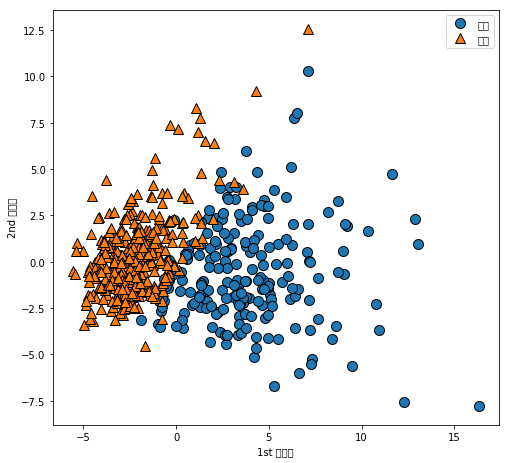

In [23]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("1st 주성분")
plt.ylabel("2nd 주성분")

회전축을 찾을 때 어떤 클래스 정보도 사용하지 X

단순히 데이터에 있는 상관관계만을 고려

두 클래스가 2차원 공간에서 꽤 잘 구분된다(선형 분류기로도 두 클래스를 잘 구분할 수 있을 것 같음)

- PCA의 단점은 그래프의 두 축을 해석하기 어려움.

In [44]:
# PCA 주성분 형태

pca.components_.shape

(100, 5655)

components_의 각 행은 주성분 하나씩을 나타내며 중요도에 따라 정렬되어 있음(맨 처음 주성분이 가장 위에 나타난다.)

In [45]:
# PCA의 주성분
pca.components_

array([[-2.80053285e-03, -3.34965438e-03, -4.00078669e-03, ...,
        -5.65135619e-03, -5.14660869e-03, -4.39910870e-03],
       [ 1.40067721e-02,  1.36567345e-02,  1.39009105e-02, ...,
        -1.96435433e-02, -1.84993390e-02, -1.72561090e-02],
       [-2.86945328e-02, -2.98412573e-02, -3.12132873e-02, ...,
         5.69682918e-04,  1.09052204e-03,  1.49338564e-03],
       ...,
       [-1.92239676e-02, -1.53168160e-02, -6.10289304e-03, ...,
         1.40812954e-05, -1.95608307e-02, -3.51720527e-02],
       [ 1.45805571e-02,  1.25293974e-02,  8.57149530e-03, ...,
        -2.87600439e-02, -4.42282557e-02, -4.52484749e-02],
       [-1.00908359e-03, -3.04979680e-04, -4.01545875e-03, ...,
        -1.12697240e-02, -8.72885436e-03, -8.08903854e-03]], dtype=float32)

Text(0, 0.5, '주성분')

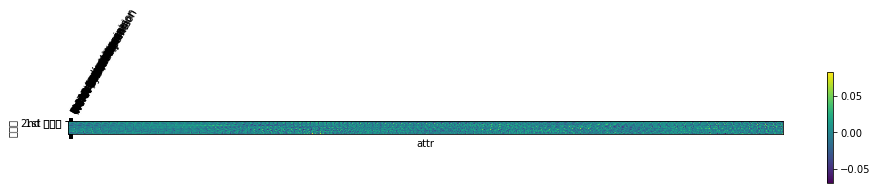

In [46]:
# 히트맵으로 시각화 하자
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["1st 주성분", "2nd 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("attr")
plt.ylabel("주성분")

### PCA로 고유얼굴 특성 추출

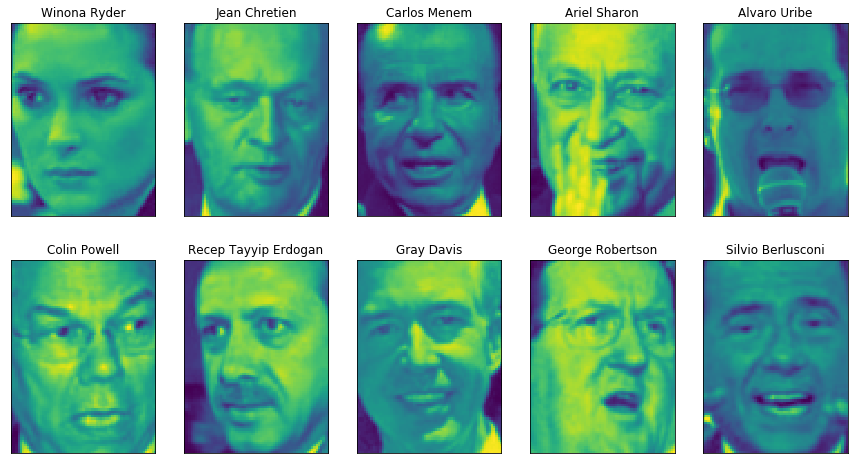

In [47]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [48]:
people.target[0:10], people.target_names[people.target[0:10]]

(array([61, 25,  9,  5,  1, 10, 48, 17, 13, 54], dtype=int64),
 array(['Winona Ryder', 'Jean Chretien', 'Carlos Menem', 'Ariel Sharon',
        'Alvaro Uribe', 'Colin Powell', 'Recep Tayyip Erdogan',
        'Gray Davis', 'George Robertson', 'Silvio Berlusconi'],
       dtype='<U25'))

In [49]:
print("people.images.shape:", people.images.shape)
print("클래스 개수:", len(people.target_names))

people.images.shape: (3023, 87, 65)
클래스 개수: 62


### 이 데이터셋은 편중되어서 조지부시와 콜린파월의 이미지가 많음

In [50]:
# 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)
# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [51]:
# 편중을 막기위해 각 사람마다 50개의 사진만 추출

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 사이로 스케일 조정합니다.
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 동일합니다.
X_people = X_people / 255.

### KNN을 이용해서 가장 가까운 얼굴 찾기

In [53]:
from sklearn.neighbors import KNeighborsClassifier
# 데이터를 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# 이웃 개수를 한 개로 하여 KNeighborsClassifier 모델을 만듭니다
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.23


#### 정확도 not good, not bad
픽셀을 사용해서 두 이미지를 비교하기 때문에, 인식이 좋지 못함

주성분으로 변환해서 거리를 계산하면 정확도가 높아지지 않을까?

-> PCA의 `화이트닝`을 사용해보자

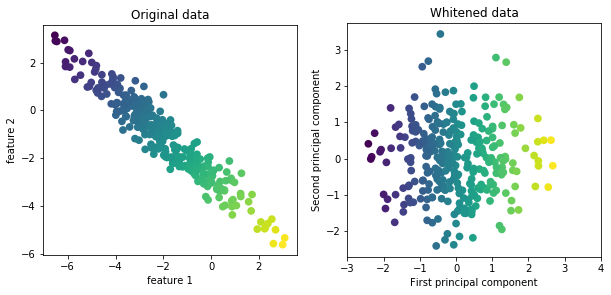

In [54]:
mglearn.plots.plot_pca_whitening()

In [55]:
# PCA 객체를 훈련 데이터로 학습싴녀서 처음 100개의 주성분 추출 -> 훈련데이터, 테스트 데이터 변환
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape:", X_train_pca.shape)

X_train_pca.shape: (1547, 100)


In [56]:
# 현재 처음 100개의 주성분에 해당하는 특성을 가짐

In [57]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도: 0.31


In [58]:
print("pca.components_.shape:", pca.components_.shape)

pca.components_.shape: (100, 5655)


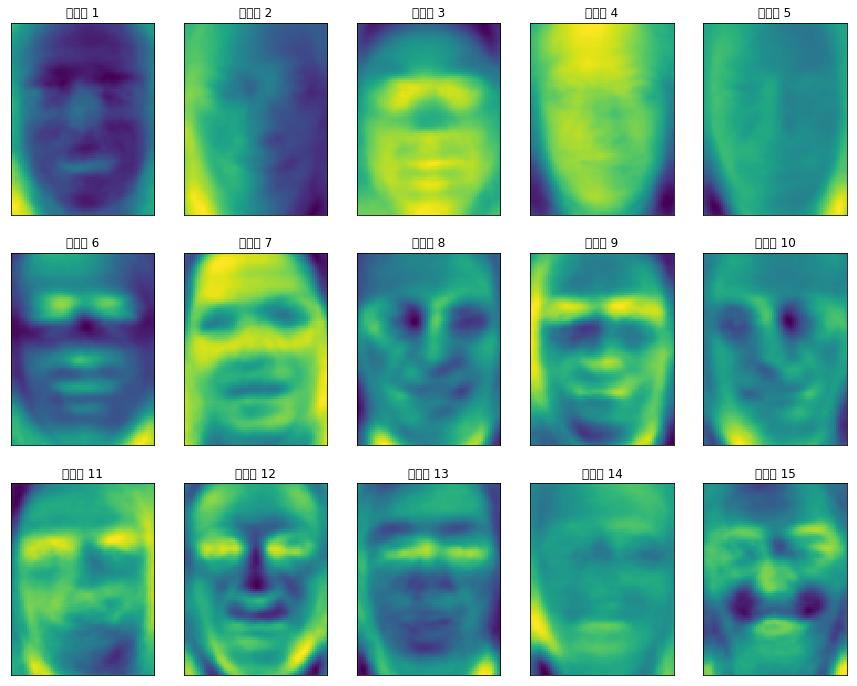

In [59]:
# 주성분 확인해보기
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("주성분 {}".format((i + 1)))

주성분을 완벽하게 이해할 순 없지만 어느정도 느낌을 짐작해볼 수는 있음

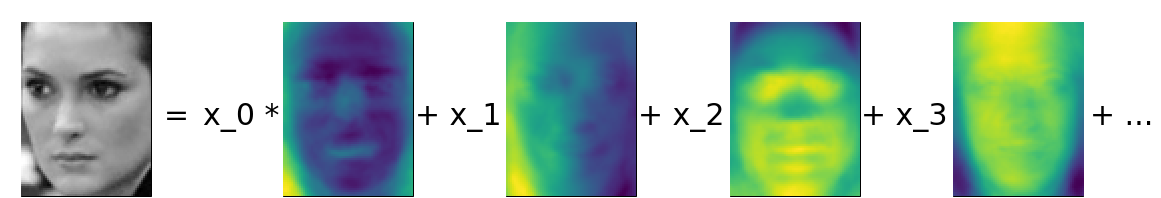

In [60]:
# 이미지를 주성분의 가중치 합으로 분해한 PCA 구성도
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

image_shape = people.images[0].shape
plt.figure(figsize=(20, 3))
ax = plt.gca()

imagebox = OffsetImage(people.images[0], zoom=2, cmap="gray")
ab = AnnotationBbox(imagebox, (.05, 0.4), pad=0.0, xycoords='data')
ax.add_artist(ab)

for i in range(4):
    imagebox = OffsetImage(pca.components_[i].reshape(image_shape), zoom=2,
                           cmap="viridis")

    ab = AnnotationBbox(imagebox, (.285 + .2 * i, 0.4),
                        pad=0.0, xycoords='data')
    ax.add_artist(ab)
    if i == 0:
        plt.text(.155, .3, 'x_{} *'.format(i), fontdict={'fontsize': 30})
    else:
        plt.text(.145 + .2 * i, .3, '+ x_{} *'.format(i),
                 fontdict={'fontsize': 30})

plt.text(.95, .3, '+ ...', fontdict={'fontsize': 30})

plt.rc('text')
plt.text(.12, .3, '=', fontdict={'fontsize': 30})
plt.axis("off")
plt.show()
plt.close()
plt.rc('text')

### PCA 모델 이해하는 다른 방법
몇 개의 주성분을 사용해 원본 데이터를 재구성해보는 것

n개의 주성분으로 데이터를 줄이고 원래 공간으로 되돌릴 수 있음

-> inverse_transform 메서드를 사용

아래 그림은 10, 50, 100, 500개의 주성분을 사용해 얼굴 이미지를 재구성한 것

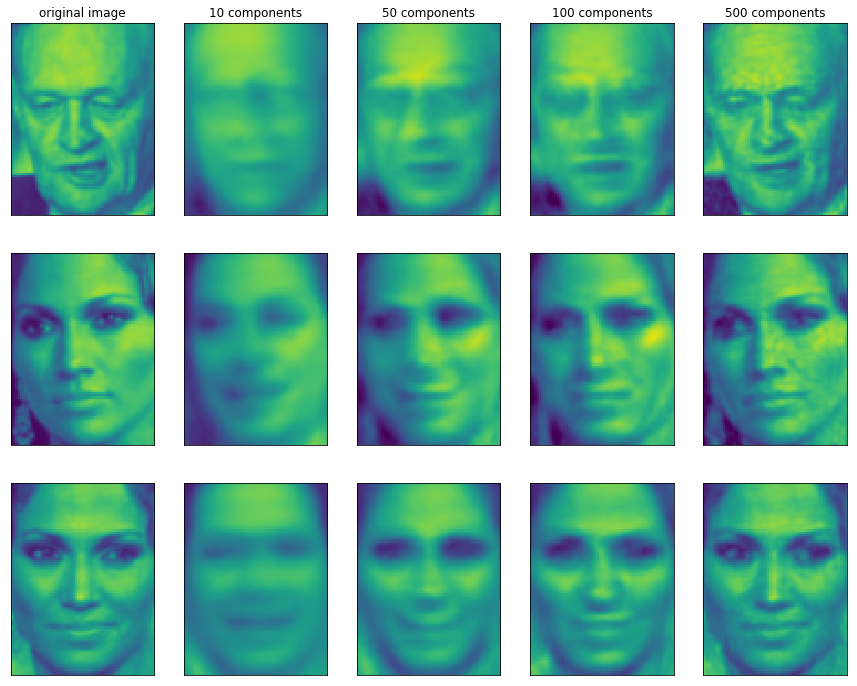

In [61]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, '두 번째 주성분')

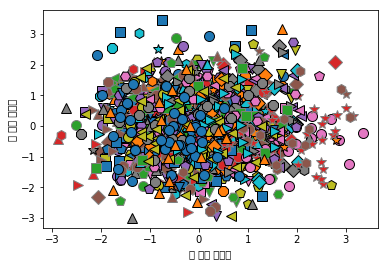

In [62]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

주성분을 두 개만 사용했을 땐 전체 데이터가 한 덩어리로 뭉쳐 있어 클래스가 잘 구분되지 않음. (당연한 말)